In [3]:
import numpy as np
from sympy import Eq, symbols, diff, Derivative as D, Function, sqrt as sqrt_, Abs as abs_, solve
from math import sqrt
from scipy.stats import norm
from matplotlib import pyplot as plt

# Correct reference portfolio for Divergence Loss


## Setup

In [4]:
def apply(func, rg):
    """
    applies `func` to `rg` and returns result as np.array
    
    equivalent to `lambda f,r: np.array([f(x) for x in r])`
    """
    return np.array([func(x) for x in rg])
A=apply

## Formulas

In [5]:
x_ = symbols("x")

In [6]:
diff(diff(  0.5*(x_-1)**2  , x_), x_).subs(x_,1)

1.00000000000000

In [7]:
diff(diff(  4*((1+x_)-sqrt_(x_))  , x_), x_).subs(x_,1)

1

## Analysis

$$
PV_{AMM} = 2 \sqrt{x}
$$

$$
PV_{ref} = 1+x
$$

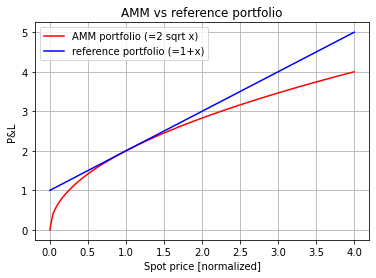

In [35]:
amm_f = lambda x: 2*sqrt(x)
repl_f = lambda x: 1+x
x_r = np.linspace(0,4,100)

plt.plot(x_r, A(amm_f, x_r), color="red", label="AMM portfolio (=2 sqrt x)")
plt.plot(x_r, A(repl_f, x_r), color="blue", label="reference portfolio (=1+x)")
plt.legend()
plt.title(f"AMM vs reference portfolio")
plt.xlabel("Spot price [normalized]")
plt.ylabel("P&L")
plt.grid()

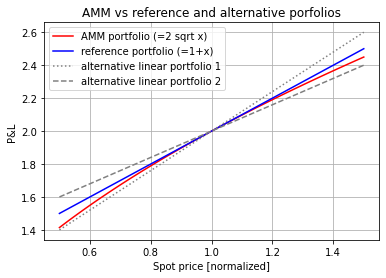

In [41]:
plt.plot(x_r, A(amm_f, x_r), color="red", label="AMM portfolio (=2 sqrt x)")
plt.plot(x_r, A(repl_f, x_r), color="blue", label="reference portfolio (=1+x)")
plt.plot(x_r, A(lambda x: 1.2*(x-1)+2, x_r), color="grey", linestyle="dotted", label="alternative linear portfolio 1")
plt.plot(x_r, A(lambda x: 0.8*(x-1)+2, x_r), color="grey", linestyle="dashed", label="alternative linear portfolio 2")
plt.legend()
plt.title(f"AMM vs reference and alternative porfolios")
plt.xlabel("Spot price [normalized]")
plt.ylabel("P&L")
plt.grid()

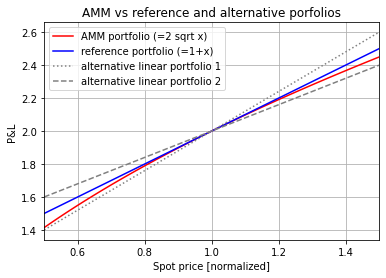

In [40]:
x_r = np.linspace(0.5,1.5,100)
plt.plot(x_r, A(amm_f, x_r), color="red", label="AMM portfolio (=2 sqrt x)")
plt.plot(x_r, A(repl_f, x_r), color="blue", label="reference portfolio (=1+x)")
plt.plot(x_r, A(lambda x: 1.2*(x-1)+2, x_r), color="grey", linestyle="dotted", label="alternative linear portfolio 1")
plt.plot(x_r, A(lambda x: 0.8*(x-1)+2, x_r), color="grey", linestyle="dashed", label="alternative linear portfolio 2")
plt.legend()
plt.title(f"AMM vs reference and alternative porfolios")
plt.xlabel("Spot price [normalized]")
plt.ylabel("P&L")
plt.xlim(0.5,1.5)
plt.grid()